<a href="https://colab.research.google.com/github/guilhermelaviola/MovieRatingAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


# **Basic information of the dataset**

In [2]:
# Importing the dataset and displying the last 10 rows:
imdb = pd.ExcelFile('IMDb.xlsx')
wl = pd.read_excel(imdb, 'Watchlist')
wl.tail(10)

Created                     Title Title Type  IMDb Rating  \
711 2024-06-19                  Derailed      Movie          6.6   
712 2024-06-20               Dinner Rush      Movie          7.2   
713 2024-06-23           Charley Varrick      Movie          7.5   
714 2024-06-25                 Leviathan      Movie          5.8   
715 2024-07-04              March or Die      Movie          6.3   
716 2024-07-06  The Strangers: Chapter 1      Movie          4.7   
717 2024-07-13                   Damaged      Movie          4.6   
718 2024-07-13     You Can't Run Forever      Movie          5.0   
719 2024-07-13                 No Way Up      Movie          4.6   
720 2024-07-14     Sunday in the Country      Movie          6.2   

     Runtime (mins)  Year                                        Genres  \
711             108  2005                        Crime, Drama, Thriller   
712              99  2000                         Crime, Drama, Romance   
713             111  1973                        Crime, Drama, Thriller   
714              98  1989  Adventure, Horror, Mystery, Sci-Fi, Thriller   
715             107  1977                Adventure, Drama, Romance, War   
716              91  2024                                        Horror   
717              97  2024       Action, Crime, Drama, Mystery, Thriller   
718             102  2024                       Drama, Horror, Thriller   
719              90  2024            Action, Adventure, Drama, Thriller   
720              93  1974                        Crime, Drama, Thriller   

     Num Votes         Release Date            Directors  
711      76688  2005-11-11 00:00:00    Mikael HÃ¥fstrÃ¶m  
712       6082  2002-03-29 00:00:00          Bob Giraldi  
713      14280  1973-10-19 00:00:00           Don Siegel  
714      24121  1989-03-17 00:00:00   George P. Cosmatos  
715       4036  1977-10-13 00:00:00        Dick Richards  
716      13363  2024-05-17 00:00:00         Renny Harlin  
717       4273  2024-04-11 00:00:00      Terry McDonough  
718       2593  2024-05-17 00:00:00  Michelle Schumacher  
719       5883  2024-02-16 00:00:00         Claudio FÃ¤h  
720        760  1974-11-22 00:00:00           John Trent

In [3]:
# Displaying the number of rows and columns in the dataset:
wl.shape

(721, 10)

In [4]:
# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         721 non-null    datetime64[ns]
 1   Title           721 non-null    object        
 2   Title Type      721 non-null    object        
 3   IMDb Rating     721 non-null    float64       
 4   Runtime (mins)  721 non-null    int64         
 5   Year            721 non-null    int64         
 6   Genres          721 non-null    object        
 7   Num Votes       721 non-null    int64         
 8   Release Date    721 non-null    object        
 9   Directors       717 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 56.5+ KB


In [5]:
# Displaying statistical data of the numerical data present in the dataset:
wl.describe()

Created  IMDb Rating  Runtime (mins)  \
count                            721   721.000000      721.000000   
mean   2022-08-13 03:27:42.690707456     6.641331      114.048544   
min              2020-04-29 00:00:00     0.000000       71.000000   
25%              2021-11-07 00:00:00     6.200000      100.000000   
50%              2022-06-21 00:00:00     6.600000      109.000000   
75%              2023-04-24 00:00:00     7.200000      120.000000   
max              2024-07-14 00:00:00     9.000000      317.000000   
std                              NaN     0.824072       25.077527   

              Year     Num Votes  
count   721.000000  7.210000e+02  
mean   1989.857143  8.002210e+04  
min    1927.000000  0.000000e+00  
25%    1981.000000  5.377000e+03  
50%    1992.000000  2.054700e+04  
75%    2000.000000  6.949700e+04  
max    2024.000000  2.871665e+06  
std      16.150090  2.014734e+05

# **Basic column data plotting**

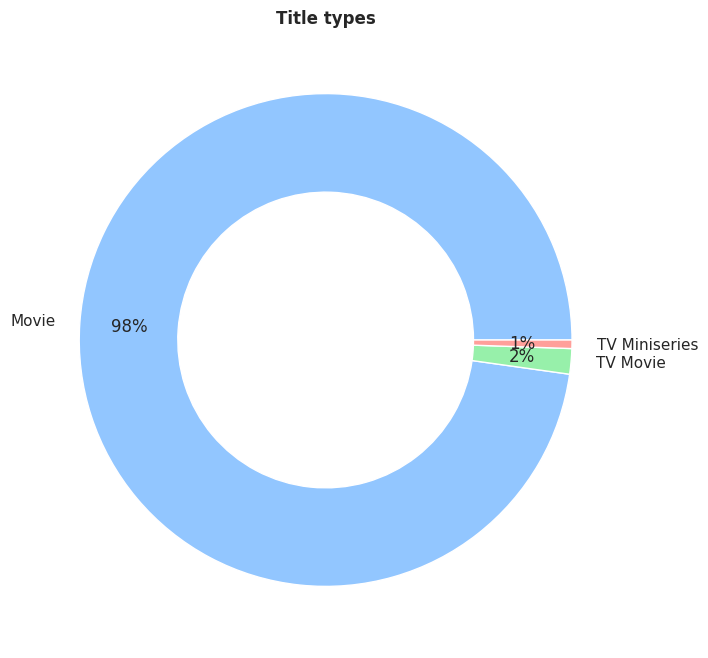

In [6]:
# Displaying the title types present in the dataset:
wl['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [7]:
# Creating a datetime object based on the dates from the dataset:
wl['Created'] = wl['Created'].map(pd.to_datetime)
wl['Day Created'] = wl['Created'].apply(lambda x : x.day)
wl['Month Created'] = wl['Created'].apply(lambda x : x.month)
wl['Year Created'] = wl['Created'].apply(lambda x : x.year)
wl['Weekday Created'] = wl['Created'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Created          721 non-null    datetime64[ns]
 1   Title            721 non-null    object        
 2   Title Type       721 non-null    object        
 3   IMDb Rating      721 non-null    float64       
 4   Runtime (mins)   721 non-null    int64         
 5   Year             721 non-null    int64         
 6   Genres           721 non-null    object        
 7   Num Votes        721 non-null    int64         
 8   Release Date     721 non-null    object        
 9   Directors        717 non-null    object        
 10  Day Created      721 non-null    int64         
 11  Month Created    721 non-null    int64         
 12  Year Created     721 non-null    int64         
 13  Weekday Created  721 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7)

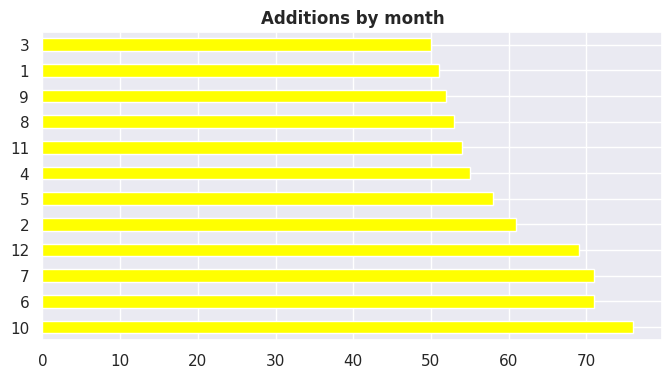

In [8]:
# Displaying the months with most and less additions:
wl['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

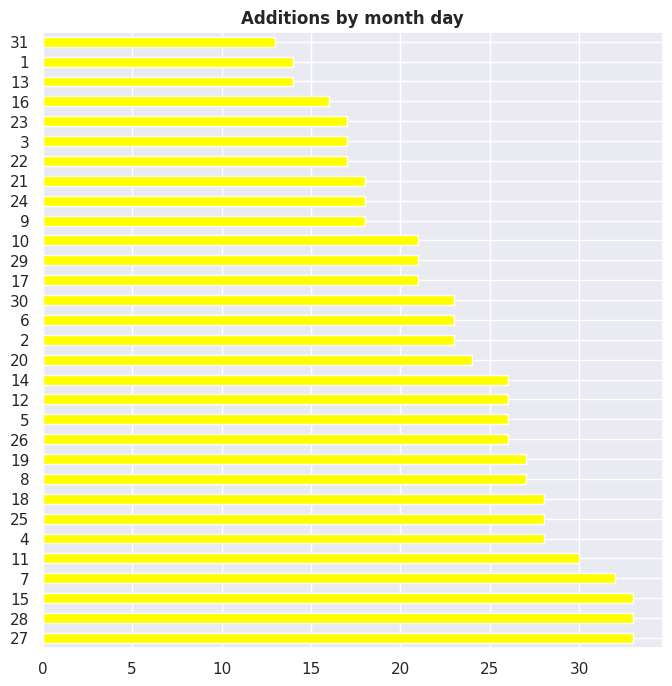

In [9]:
# Displaying the month days with most and less additions:
wl['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

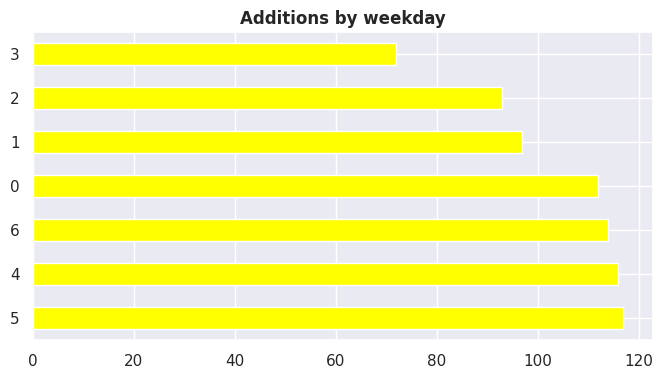

In [10]:
# Displaying the weekdays with most and less additions:
wl['Weekday Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

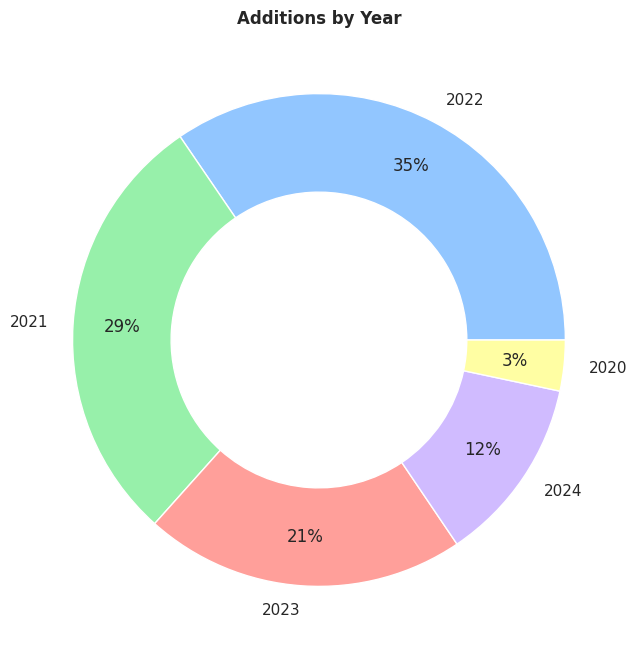

In [11]:
# Displaying the years with most and less additions:
wl['Year Created'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()

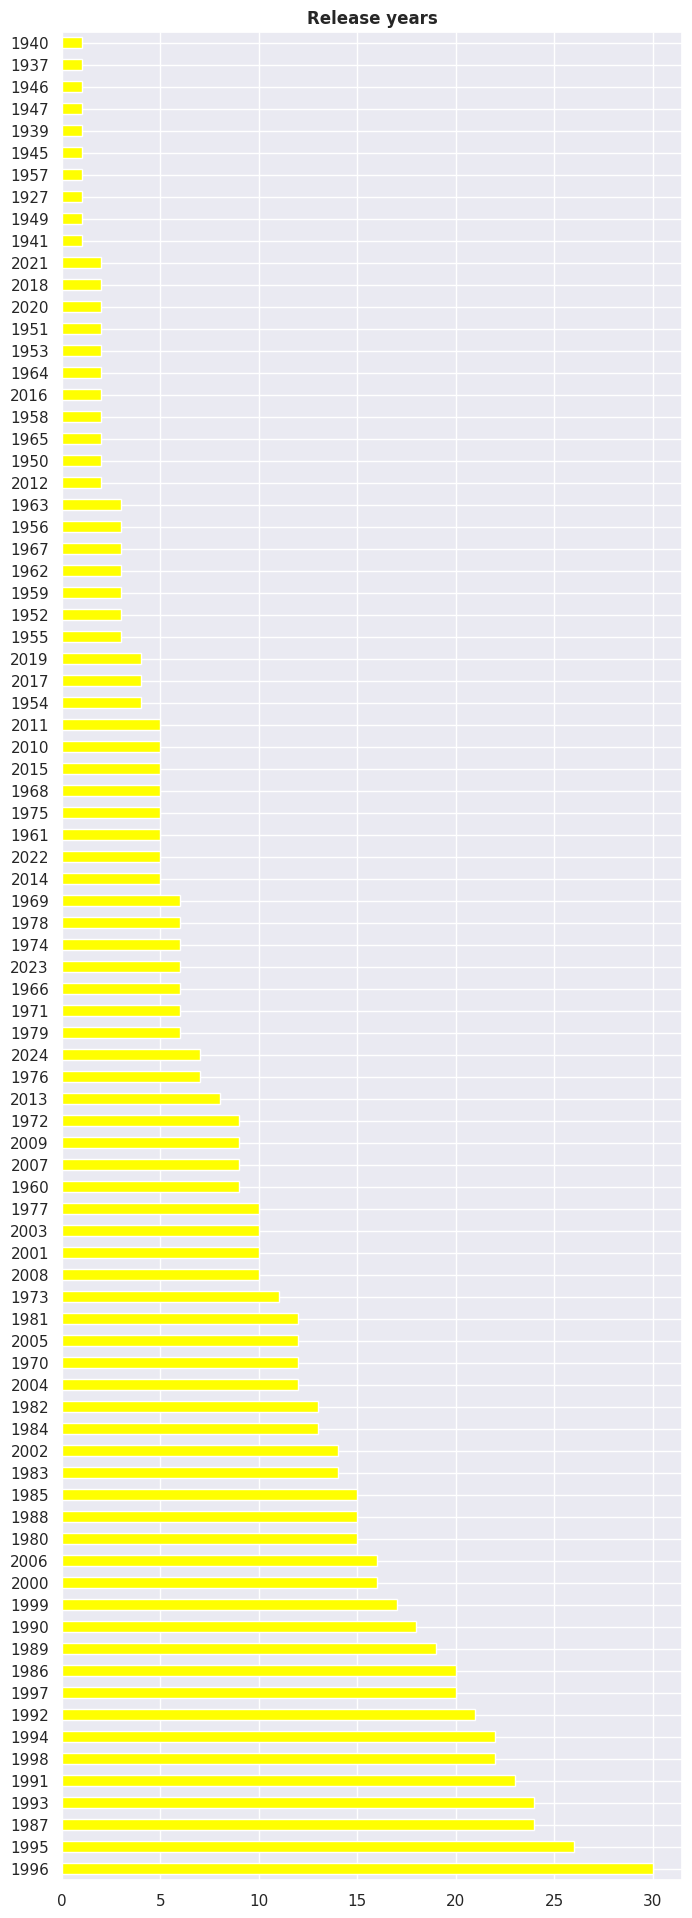

In [12]:
# Displaying distibution of release years in the dataset:
wl['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

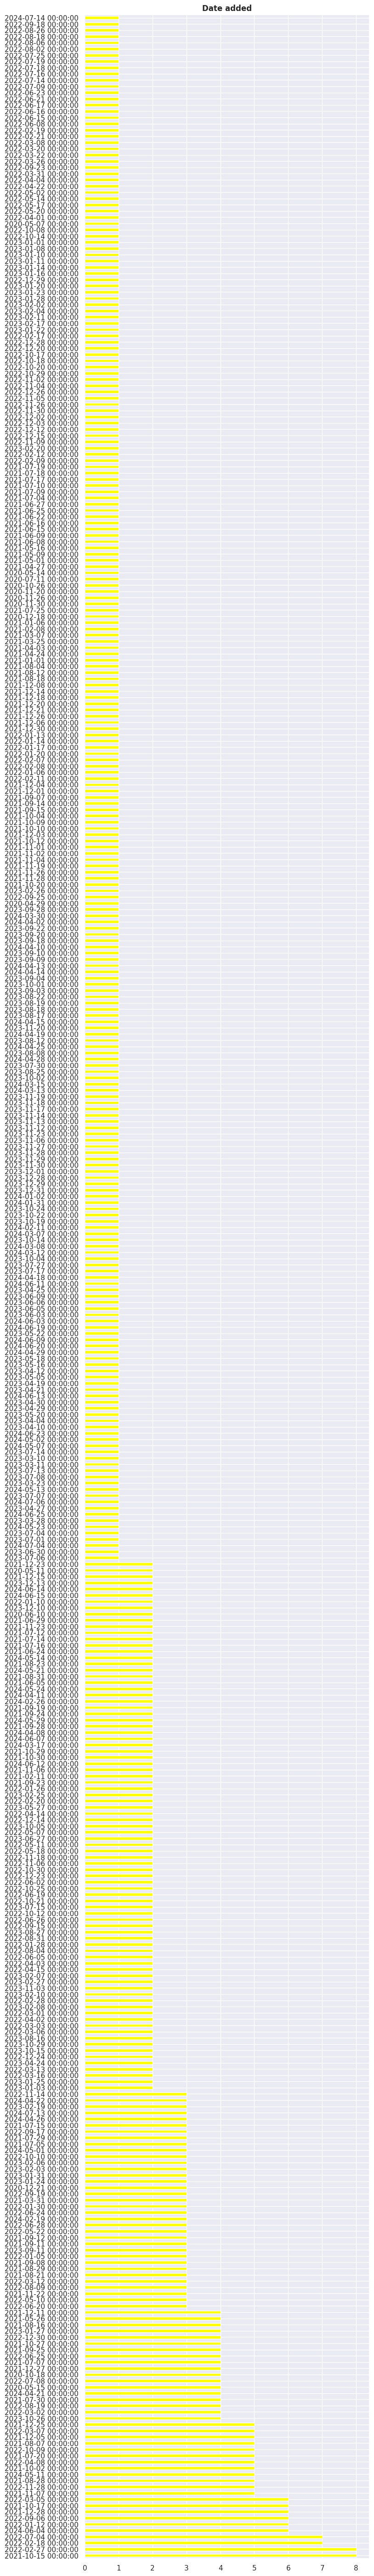

In [13]:
# Displaying distibution of dates added in the dataset:
wl['Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 72))
plt.ylabel(None)
plt.title('Date added', fontweight = 'bold')
plt.show()

# **Applying functions to combine data from more than one column to generate new columns with analytics**

In [14]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Decade'] = wl['Year'].apply(movies_by_decade)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
2 2020-05-11                                          Alaska      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-14                               Lady in the Water      Movie   

   IMDb Rating  Runtime (mins)  Year                             Genres  \
0          8.4             125  1940                 Comedy, Drama, War   
1          7.3             116  2007   Drama, Horror, Musical, Thriller   
2          5.7             109  1996           Adventure, Drama, Family   
3          5.3              95  1996    Adventure, Crime, Drama, Family   
4          5.5             110  2006  Drama, Fantasy, Mystery, Thriller   

   Num Votes         Release Date           Directors  Day Created  \
0     237408  1940-10-15 00:00:00     Charles Chaplin           29   
1     386979  2007-12-03 00:00:00          Tim Burton            7   
2       5818  1996-08-14 00:00:00    Fraser C. Heston           11   
3      11667  1996-05-17 00:00:00        Alan Shapiro           11   
4     103799  2006-07-17 00:00:00  M. Night Shyamalan           14   

   Month Created  Year Created  Weekday Created Decade  
0              4          2020                2  1940s  
1              5          2020                3  2000s  
2              5          2020                0  1990s  
3              5          2020                0  1990s  
4              5          2020                3  2000s

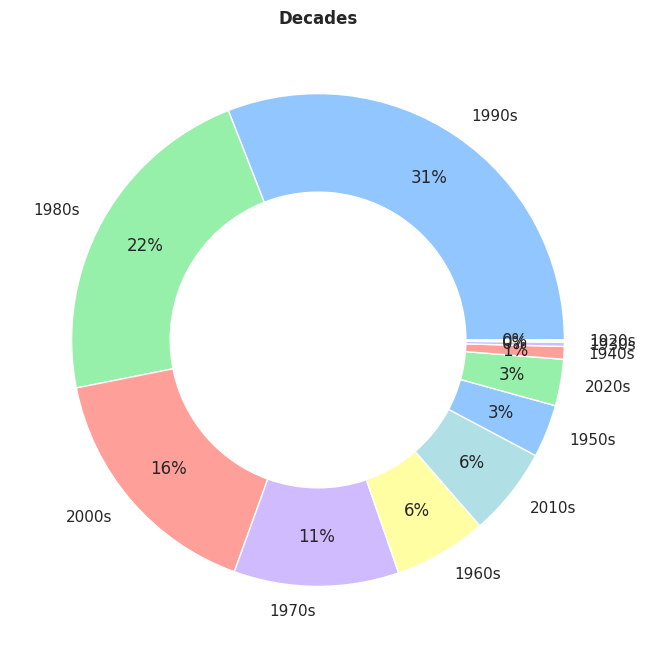

In [15]:
# Displaying the decades the movies are from:
wl['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decades', fontweight = 'bold')
plt.show()

In [16]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quality'] = wl['IMDb Rating'].apply(imdb_rating)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
2 2020-05-11                                          Alaska      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-14                               Lady in the Water      Movie   

   IMDb Rating  Runtime (mins)  Year                             Genres  \
0          8.4             125  1940                 Comedy, Drama, War   
1          7.3             116  2007   Drama, Horror, Musical, Thriller   
2          5.7             109  1996           Adventure, Drama, Family   
3          5.3              95  1996    Adventure, Crime, Drama, Family   
4          5.5             110  2006  Drama, Fantasy, Mystery, Thriller   

   Num Votes         Release Date           Directors  Day Created  \
0     237408  1940-10-15 00:00:00     Charles Chaplin           29   
1     386979  2007-12-03 00:00:00          Tim Burton            7   
2       5818  1996-08-14 00:00:00    Fraser C. Heston           11   
3      11667  1996-05-17 00:00:00        Alan Shapiro           11   
4     103799  2006-07-17 00:00:00  M. Night Shyamalan           14   

   Month Created  Year Created  Weekday Created Decade  Quality  
0              4          2020                2  1940s  Amazing  
1              5          2020                3  2000s     Good  
2              5          2020                0  1990s  Regular  
3              5          2020                0  1990s  Regular  
4              5          2020                3  2000s  Regular

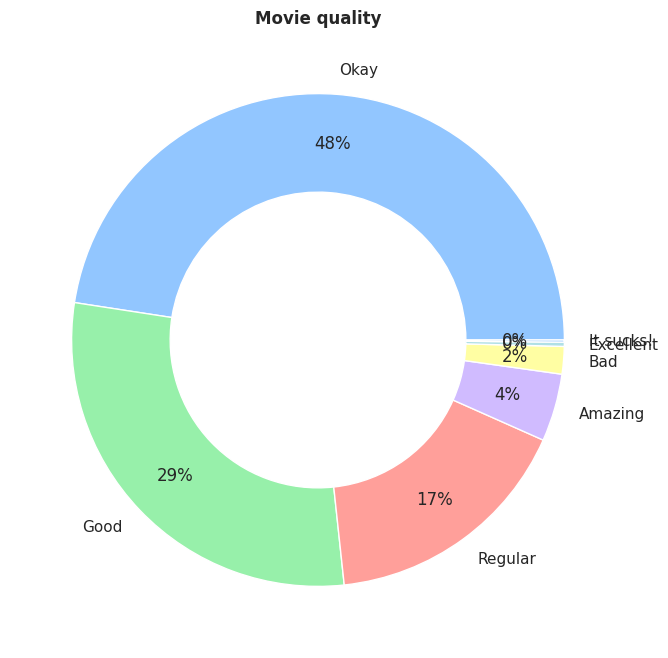

In [17]:
# Displaying the movie rating classification based on the algorithm above:
wl['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [18]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes > 2000000:
    popularity = 'Over 2M votes'
  elif num_votes > 1000000 and num_votes <= 2000000:
    popularity = 'Over 1M votes'
  elif num_votes > 500000 and num_votes <= 1000000:
    popularity = 'Over 500k votes'
  elif num_votes > 250000 and num_votes <= 500000:
    popularity = 'Over 250k votes'
  else:
    popularity = 'Less than 250k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie popularity'] = wl['Num Votes'].apply(movie_popularity)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
2 2020-05-11                                          Alaska      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-14                               Lady in the Water      Movie   

   IMDb Rating  Runtime (mins)  Year                             Genres  \
0          8.4             125  1940                 Comedy, Drama, War   
1          7.3             116  2007   Drama, Horror, Musical, Thriller   
2          5.7             109  1996           Adventure, Drama, Family   
3          5.3              95  1996    Adventure, Crime, Drama, Family   
4          5.5             110  2006  Drama, Fantasy, Mystery, Thriller   

   Num Votes         Release Date           Directors  Day Created  \
0     237408  1940-10-15 00:00:00     Charles Chaplin           29   
1     386979  2007-12-03 00:00:00          Tim Burton            7   
2       5818  1996-08-14 00:00:00    Fraser C. Heston           11   
3      11667  1996-05-17 00:00:00        Alan Shapiro           11   
4     103799  2006-07-17 00:00:00  M. Night Shyamalan           14   

   Month Created  Year Created  Weekday Created Decade  Quality  \
0              4          2020                2  1940s  Amazing   
1              5          2020                3  2000s     Good   
2              5          2020                0  1990s  Regular   
3              5          2020                0  1990s  Regular   
4              5          2020                3  2000s  Regular   

       Movie popularity  
0  Less than 250k votes  
1       Over 250k votes  
2  Less than 250k votes  
3  Less than 250k votes  
4  Less than 250k votes

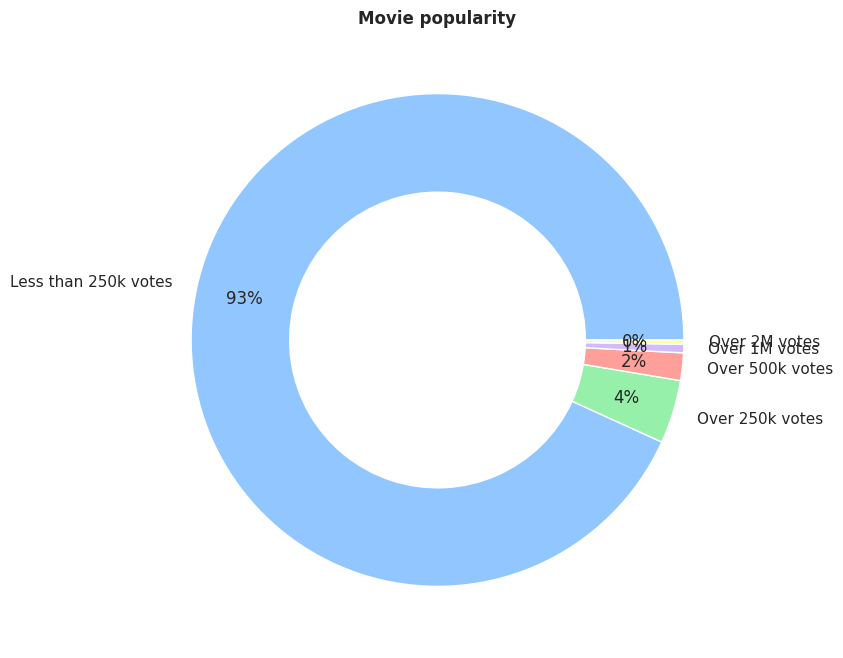

In [19]:
# Displaying the movie popularity based on the algorithm above:
wl['Movie popularity'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [20]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie duration'] = wl['Runtime (mins)'].apply(movie_duration)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
2 2020-05-11                                          Alaska      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-14                               Lady in the Water      Movie   

   IMDb Rating  Runtime (mins)  Year                             Genres  \
0          8.4             125  1940                 Comedy, Drama, War   
1          7.3             116  2007   Drama, Horror, Musical, Thriller   
2          5.7             109  1996           Adventure, Drama, Family   
3          5.3              95  1996    Adventure, Crime, Drama, Family   
4          5.5             110  2006  Drama, Fantasy, Mystery, Thriller   

   Num Votes         Release Date           Directors  Day Created  \
0     237408  1940-10-15 00:00:00     Charles Chaplin           29   
1     386979  2007-12-03 00:00:00          Tim Burton            7   
2       5818  1996-08-14 00:00:00    Fraser C. Heston           11   
3      11667  1996-05-17 00:00:00        Alan Shapiro           11   
4     103799  2006-07-17 00:00:00  M. Night Shyamalan           14   

   Month Created  Year Created  Weekday Created Decade  Quality  \
0              4          2020                2  1940s  Amazing   
1              5          2020                3  2000s     Good   
2              5          2020                0  1990s  Regular   
3              5          2020                0  1990s  Regular   
4              5          2020                3  2000s  Regular   

       Movie popularity         Movie duration  
0  Less than 250k votes    Between 2h and 2h29  
1       Over 250k votes  Between 1h40 and 1h59  
2  Less than 250k votes  Between 1h40 and 1h59  
3  Less than 250k votes  Between 1h30 and 1h39  
4  Less than 250k votes  Between 1h40 and 1h59

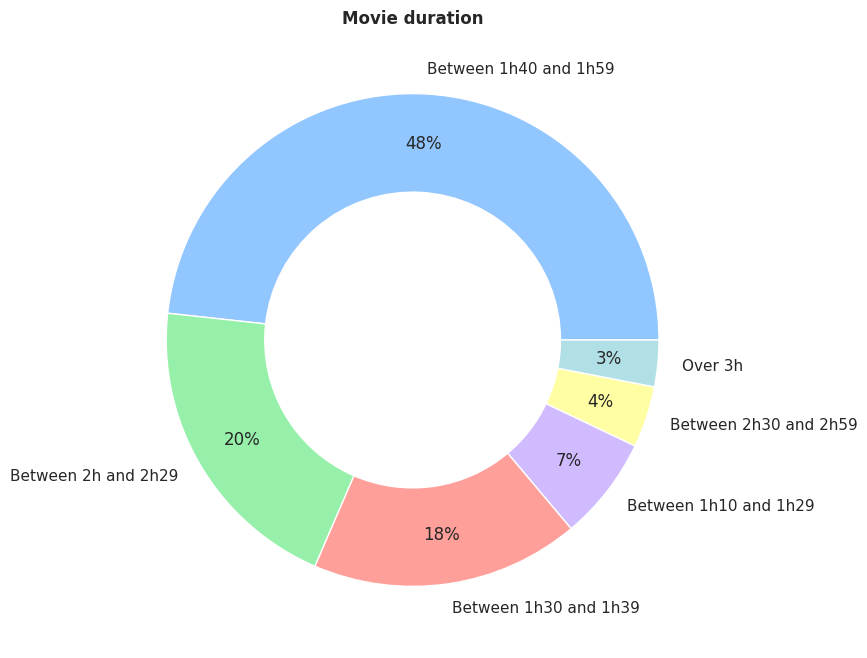

In [21]:
# Displaying the movie duration based on the algorithm above:
wl['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [22]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quartile Added'] = wl['Month Created'].apply(year_quartile)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
2 2020-05-11                                          Alaska      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-14                               Lady in the Water      Movie   

   IMDb Rating  Runtime (mins)  Year                             Genres  \
0          8.4             125  1940                 Comedy, Drama, War   
1          7.3             116  2007   Drama, Horror, Musical, Thriller   
2          5.7             109  1996           Adventure, Drama, Family   
3          5.3              95  1996    Adventure, Crime, Drama, Family   
4          5.5             110  2006  Drama, Fantasy, Mystery, Thriller   

   Num Votes         Release Date           Directors  Day Created  \
0     237408  1940-10-15 00:00:00     Charles Chaplin           29   
1     386979  2007-12-03 00:00:00          Tim Burton            7   
2       5818  1996-08-14 00:00:00    Fraser C. Heston           11   
3      11667  1996-05-17 00:00:00        Alan Shapiro           11   
4     103799  2006-07-17 00:00:00  M. Night Shyamalan           14   

   Month Created  Year Created  Weekday Created Decade  Quality  \
0              4          2020                2  1940s  Amazing   
1              5          2020                3  2000s     Good   
2              5          2020                0  1990s  Regular   
3              5          2020                0  1990s  Regular   
4              5          2020                3  2000s  Regular   

       Movie popularity         Movie duration Quartile Added  
0  Less than 250k votes    Between 2h and 2h29         Second  
1       Over 250k votes  Between 1h40 and 1h59         Second  
2  Less than 250k votes  Between 1h40 and 1h59         Second  
3  Less than 250k votes  Between 1h30 and 1h39         Second  
4  Less than 250k votes  Between 1h40 and 1h59         Second

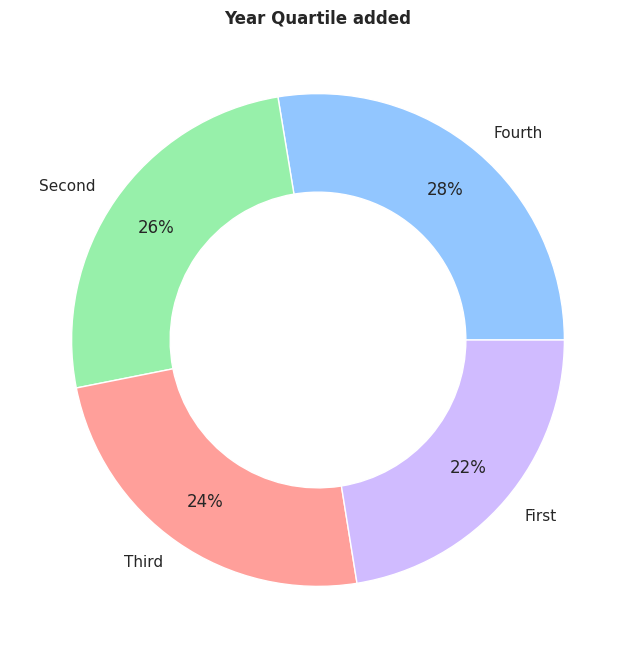

In [23]:
# Displaying the quartile the movie was added based on the algorithm above:
wl['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [24]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Month Half Added'] = wl['Day Created'].apply(month_half)
wl.head()

Created                                           Title Title Type  \
0 2020-04-29                              The Great Dictator      Movie   
1 2020-05-07  Sweeney Todd: The Demon Barber of Fleet Street      Movie   
2 2020-05-11                                          Alaska      Movie   
3 2020-05-11                                         Flipper      Movie   
4 2020-05-14                               Lady in the Water      Movie   

   IMDb Rating  Runtime (mins)  Year                             Genres  \
0          8.4             125  1940                 Comedy, Drama, War   
1          7.3             116  2007   Drama, Horror, Musical, Thriller   
2          5.7             109  1996           Adventure, Drama, Family   
3          5.3              95  1996    Adventure, Crime, Drama, Family   
4          5.5             110  2006  Drama, Fantasy, Mystery, Thriller   

   Num Votes         Release Date           Directors  Day Created  \
0     237408  1940-10-15 00:00:00     Charles Chaplin           29   
1     386979  2007-12-03 00:00:00          Tim Burton            7   
2       5818  1996-08-14 00:00:00    Fraser C. Heston           11   
3      11667  1996-05-17 00:00:00        Alan Shapiro           11   
4     103799  2006-07-17 00:00:00  M. Night Shyamalan           14   

   Month Created  Year Created  Weekday Created Decade  Quality  \
0              4          2020                2  1940s  Amazing   
1              5          2020                3  2000s     Good   
2              5          2020                0  1990s  Regular   
3              5          2020                0  1990s  Regular   
4              5          2020                3  2000s  Regular   

       Movie popularity         Movie duration Quartile Added Month Half Added  
0  Less than 250k votes    Between 2h and 2h29         Second           Second  
1       Over 250k votes  Between 1h40 and 1h59         Second            First  
2  Less than 250k votes  Between 1h40 and 1h59         Second            First  
3  Less than 250k votes  Between 1h30 and 1h39         Second            First  
4  Less than 250k votes  Between 1h40 and 1h59         Second            First

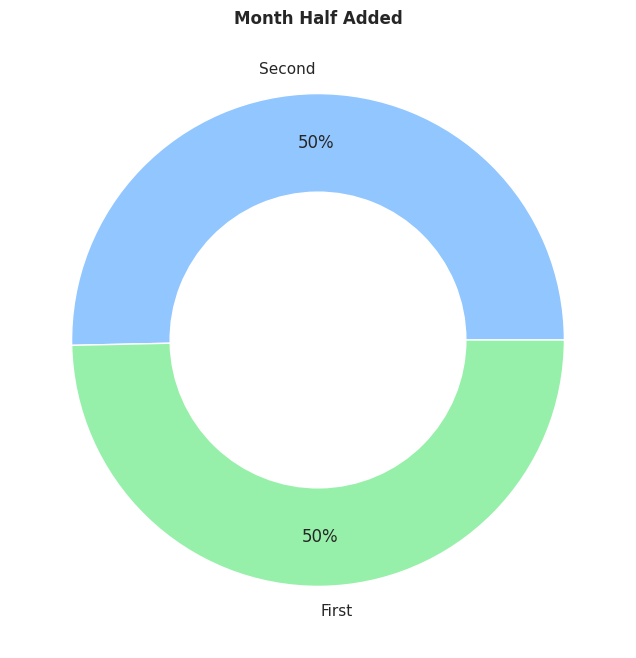

In [25]:
# Displaying the month half the movie was added based on the algorithm above:
wl['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

# **The algorithm below was a bit more complicated to be implemented, as the movie genres are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [26]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
wl['Genres'] = wl['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = wl.index, columns = wl['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [28]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         599   122
Adventure      602   119
Animation      703    18
Biography      652    69
Comedy         487   234
Crime          577   144
Documentary    715     6
Drama          205   516
Family         645    76
Fantasy        663    58
Film-Noir      717     4
History        679    42
Horror         697    24
Music          693    28
Musical        697    24
Mystery        671    50
Romance        543   178
Sci-Fi         666    55
Sport          675    46
Thriller       575   146
War            668    53
Western        695    26


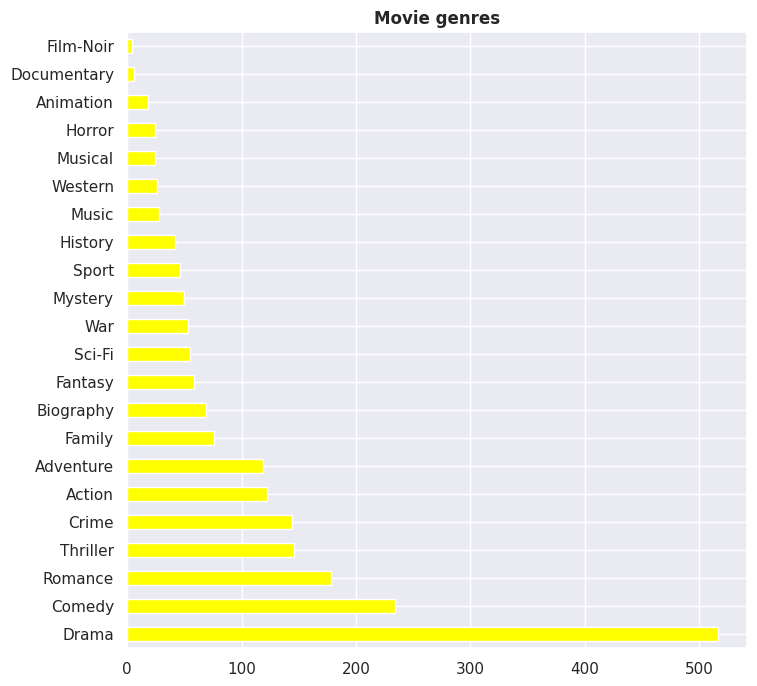

In [29]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [30]:
wl = wl[wl['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = wl.index, columns = wl['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-30-96bf50eac1cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [31]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                     False  True
Adrian Lyne            715     0
Alan Parker            716     0
Alan Shapiro           716     0
Albert Band            716     0
Albert Brooks          716     0
...                    ...   ...
William Wyler          716     0
Wolfgang Petersen      716     0
Wolfgang Reitherman    714     0
Yves Simoneau          716     0
Zoltan Korda           716     1

[564 rows x 2 columns]


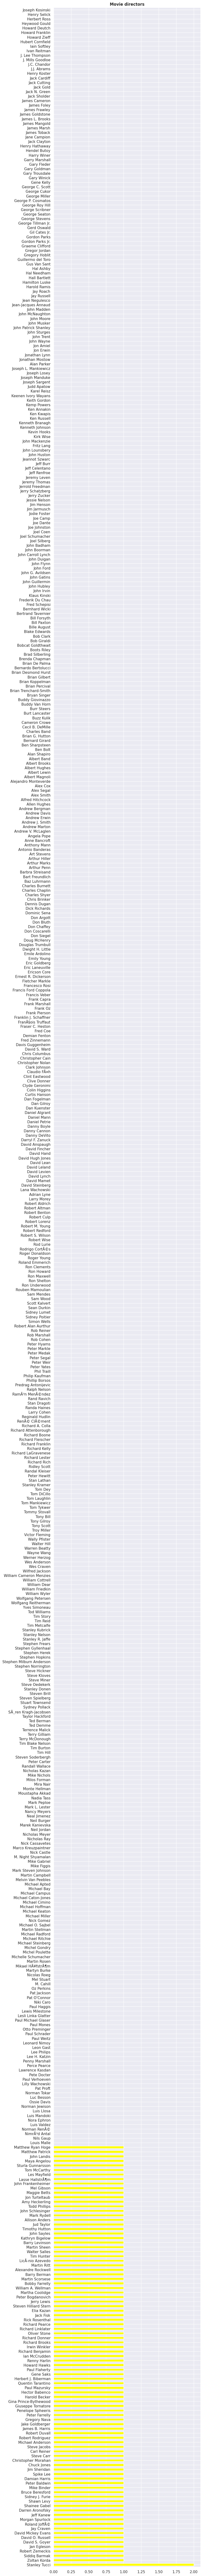

In [33]:
# Displaying the proportions of the directors present in the dataset:
final_directors_counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 140))
plt.ylabel(None)
plt.title('Movie directors', fontweight = 'bold')
plt.show()